# **Mount the google drive to google colab**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import Required Module**



In [ ]:
import tensorflow as tf
from keras.callbacks import EarlyStopping
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from keras.models import Sequential
from IPython.display import display
from keras.regularizers import l2
from PIL import Image
from tensorflow.keras.losses import categorical_crossentropy
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
import numpy as np
import cv2
from keras.optimizers import SGD
from keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# **Read the data from csv into dataframe**

1.   Remove the age and gender column from the dataset 




In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/age_gender.csv")
df.drop(columns= ['img_name','age','gender'], axis=1, inplace= True)
df['pixels']=df['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

In [ ]:
X = np.array(df['pixels'].tolist())
y = df['ethnicity']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)


# **# Visualize the Ethnicity distribution in the data**

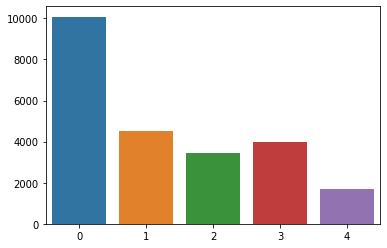

In [ ]:
import seaborn as sns
sns.barplot(y=list(df['ethnicity'].value_counts().values),x= list(df['ethnicity'].value_counts().index))



Distric=bution of data in the sample

Class=1, n=3624 (19.110%)
Class=0, n=8056 (42.480%)
Class=2, n=2723 (14.359%)
Class=3, n=3185 (16.795%)
Class=4, n=1376 (7.256%)


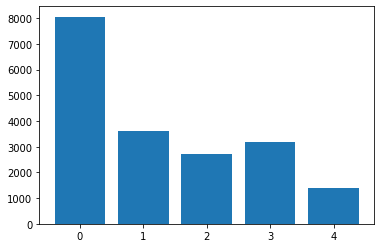

In [ ]:
from pandas import read_csv
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

y_en = LabelEncoder().fit_transform(y_train)
# summarize distribution
counter = Counter(y_en)
for k,v in counter.items():
	per = v / len(y_en) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

should we sampe before split or after split?

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

Class=1, n=8056 (20.000%)
Class=0, n=8056 (20.000%)
Class=2, n=8056 (20.000%)
Class=3, n=8056 (20.000%)
Class=4, n=8056 (20.000%)


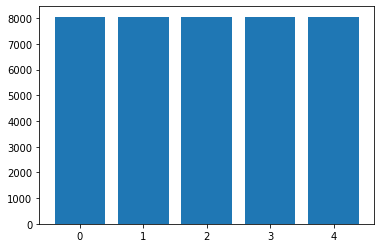

In [ ]:
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

oversample = SMOTE()
X_, y_ = oversample.fit_resample(X_train, y_train)
# summarize distribution
counter = Counter(y_)
for k,v in counter.items():
	per = v / len(y_) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
X_ = X_.reshape(X_.shape[0],48,48,1)
print(y_.shape)

Y_ =  to_categorical(y_)


(40280,)


In [ ]:
from keras.regularizers import l2
model4=Sequential()
model4.add(Conv2D(36,(3,3),input_shape=(48,48,1),padding='same'))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(MaxPool2D(2,2))

model4.add(Conv2D(64,(3,3)))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(MaxPool2D(2,2))


model4.add(Conv2D(128,(3,3)))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(MaxPool2D(2,2))

model4.add(Flatten())



model4.add(Dense(1024, activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(512, activation='relu'))
model4.add(Dropout(0.3))
model4.add(Dense(5,activation='softmax'))

opt =Adam(lr=0.0001,decay=0.000001)
#opt =Adam(lr=0.001)
model4.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 36)        360       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 36)        144       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 36)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 36)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        20800     
_________________________________________________________________
batch_normalization_1 (Batch (None, 22, 22, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 22, 22, 64)        0

# ***Model  with batch normalization with no balancing of the data ***

In [ ]:
# fit model
history4 = model4.fit(X_,Y_ ,epochs=500,validation_split=0.2,validation_data=(X_test,y_test),batch_size =32)


Epoch 1/500
1007/1007 [==============================] - 21s 5ms/step - loss: 1.0493 - accuracy: 0.6117 - val_loss: 2.2366 - val_accuracy: 0.1610
Epoch 2/500
1007/1007 [==============================] - 4s 4ms/step - loss: 0.6150 - accuracy: 0.7931 - val_loss: 1.9211 - val_accuracy: 0.1678
Epoch 3/500
1007/1007 [==============================] - 4s 4ms/step - loss: 0.4840 - accuracy: 0.8403 - val_loss: 1.6990 - val_accuracy: 0.2301
Epoch 4/500
1007/1007 [==============================] - 4s 4ms/step - loss: 0.4138 - accuracy: 0.8581 - val_loss: 1.8085 - val_accuracy: 0.2329
Epoch 5/500
1007/1007 [==============================] - 4s 4ms/step - loss: 0.3523 - accuracy: 0.8820 - val_loss: 1.5643 - val_accuracy: 0.2681
Epoch 6/500
1007/1007 [==============================] - 4s 4ms/step - loss: 0.2910 - accuracy: 0.9024 - val_loss: 1.2757 - val_accuracy: 0.4242
Epoch 7/500
1007/1007 [==============================] - 4s 4ms/step - loss: 0.2464 - accuracy: 0.9162 - val_loss: 1.4624 - val_a

In [ ]:
X_test.reshape(X_test.shape[0], 48,48,1)
y_test_ = to_categorical(y_test)
print(y_test_ .shape)

x_test = X_test.reshape(X_test.shape[0], 48,48,1)

print(x_test .shape)

(4741, 5)
(4741, 48, 48, 1)


# **visualize** the train test accuracy and loss plot to check for overfitting

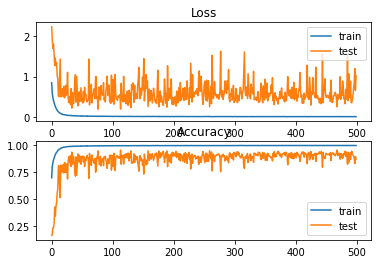

In [ ]:
# evaluate the model


train_acc = model4.evaluate(X_,Y_, verbose=0)
test_acc = model4.evaluate(x_test,y_test_, verbose=0)

# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history4.history['loss'], label='train')
plt.plot(history4.history['val_loss'], label='test')
plt.legend()




# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history4.history['accuracy'], label='train')
plt.plot(history4.history['val_accuracy'], label='test')
plt.legend()
plt.show()

# **Evalaute the model on Test data set**

In [ ]:
#Making prediction
y_pred=model4.predict_classes(x_test)
y_true=np.argmax( y_test_,axis=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    #Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#print(cm)

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')


    #Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

# **Print the confusion matrix**

Confusion matrix, without normalization


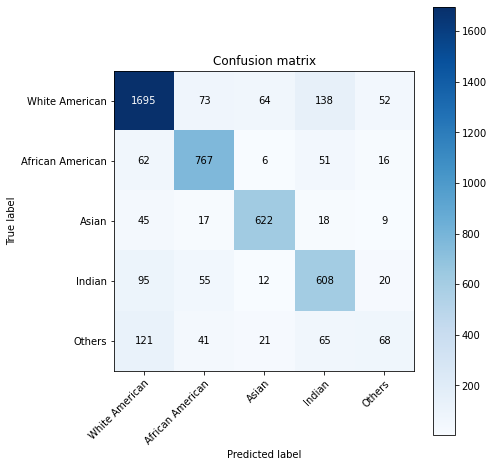

In [ ]:
from sklearn.metrics import confusion_matrix
#Plotting the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred)

#Defining the class labels
class_names=[ 'White American','African American' ,'Asian' ,'Indian','Others'] 

# Plotting  confusion matrix
plot_confusion_matrix(y_true, y_pred, classes = class_names, title='Confusion matrix')

# ***As data is imbalanced so relying on other parameters rather than accuracy . Calculation for Recall, precisiion, f1-score ***

In [ ]:
from sklearn import metrics
classification_report = metrics.classification_report( y_true,y_pred,target_names =class_names )
print(classification_report)

                  precision    recall  f1-score   support

  White American       0.84      0.84      0.84      2022
African American       0.80      0.85      0.83       902
           Asian       0.86      0.87      0.87       711
          Indian       0.69      0.77      0.73       790
          Others       0.41      0.22      0.28       316

        accuracy                           0.79      4741
       macro avg       0.72      0.71      0.71      4741
    weighted avg       0.78      0.79      0.79      4741



# ***Displaying the ROC curve ***

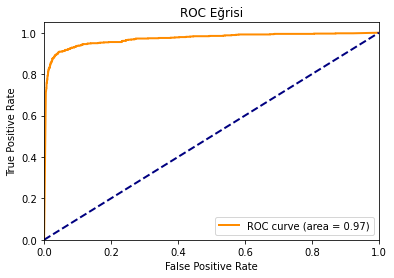

In [ ]:
y_score = model4.predict( x_test)

from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Learn to predict each class against the other


n_classes = 5 # number of class




# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
lw = 2 # line_width
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2]) # Drawing Curve according to 2. class 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  if __name__ == '__main__':


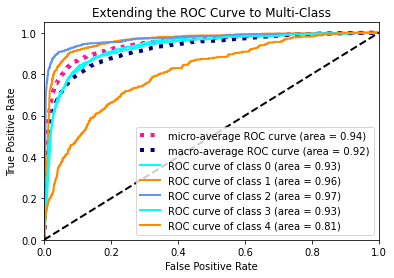

In [ ]:
from itertools import cycle

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Extending the ROC Curve to Multi-Class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
model4.save('model4.hdf5')

from keras.models import load_model
race_model = load_model("/content/model4.hdf5")

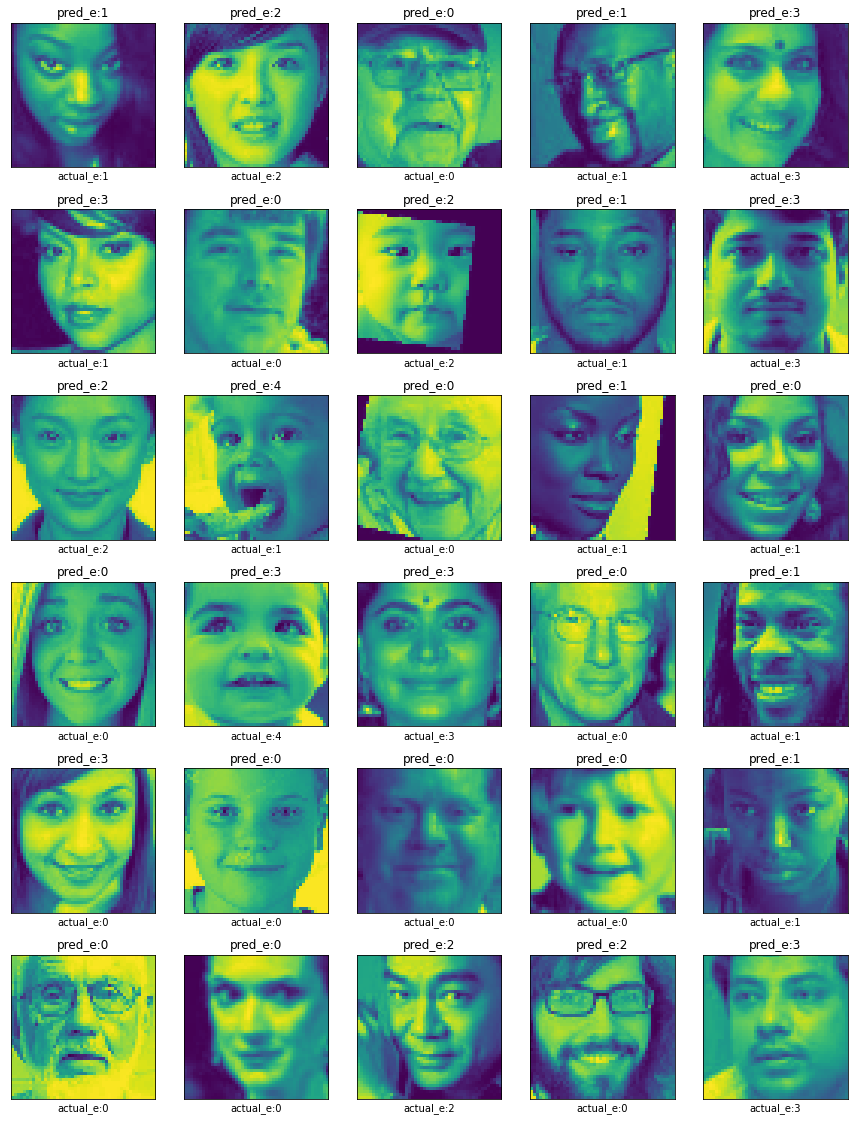

In [ ]:
import math

y_pred_prob= race_model.predict(x_test)
ethnicity_true = np.argmax(y_test_,axis=1)
ethnicity_pred= y_pred_prob.argmax(axis=-1)

import math
n = 30
random_indices = np.random.permutation(n)
n_cols = 5
n_rows = math.ceil(n / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20))
for i, img_idx in enumerate(random_indices):
    ax = axes.flat[i]
    ax.imshow(X_test[img_idx].reshape(48,48))
    ax.set_title( 'pred_e:{}'.format(int(ethnicity_pred[img_idx])))
    ax.set_xlabel( 'actual_e:{}'.format(int(ethnicity_true[img_idx])))
    ax.set_xticks([])
    ax.set_yticks([])